In [6]:
"""# TASK 1: Titanic Survival Prediction
# Data Science Internship at Codesoft
#TASK:
use the titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
the dataset typically used for this projects contain information about individual passengers, such as their age, gender,ticket class,fare,cabin and whether
or not they survived""";

In [7]:
"""Data Description:
    pclass:A proxy for socio-economic status(SES)
        1st = Upper
        2nd = Middle
        3rd = Lower
    age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
    sibsp:The dataset defines amily relations in this way...
        Sibling = brother,sister,stepbrother,stepsister
        Spouse = husband,wife(mistresses and finances were ignored)
    parch:The dataset defines family relations in this way...
        Parent = mother,father
        Child = daughter,son,stepdaughter,stepson,some children travelled only with a nanny, therefore parch=0 for them.""";

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
titanic_data = pd.read_csv("Titanic-Dataset.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#since age,cabin, and embarked has Null values or blank
#we will fill blank with median value
titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace=True)

In [19]:
#Count the Embarked 
titanic_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [14]:
#Replace blanks with mode value
titanic_data['Embarked'].fillna('S',inplace=True)

In [15]:
#check Null value in data
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
#we will remove the "cabin" column because it contains a significant number of missing values.
titanic_data.drop(columns="Cabin",inplace=True)

In [17]:
#Last check null value and Dataset
print(titanic_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [18]:
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  


In [19]:
#Now Data is cleaned...
# EXPLORATORY DATA ANALYSIS
# survival variable describe as 0= No, 1= Yes
import seaborn as sns

In [20]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

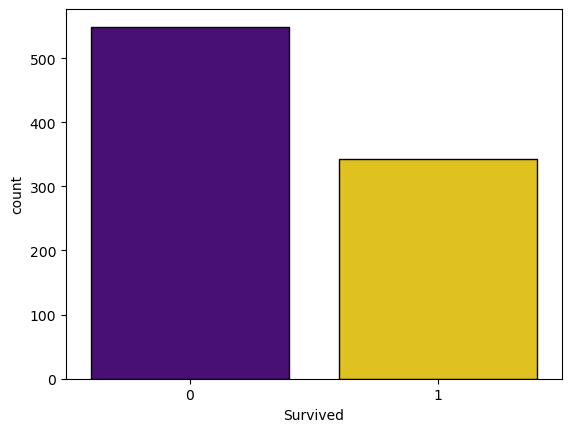

In [21]:
sns.countplot(data = titanic_data,x='Survived',palette=['indigo','gold'],linewidth=1,edgecolor='black')

In [22]:
"""Pclass data describe as:
     1st = Upper
     2nd = Middle
     3rd = Lower""";

<Axes: xlabel='Pclass', ylabel='count'>

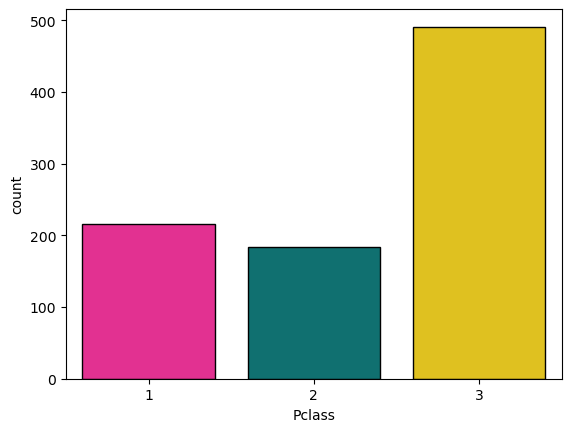

In [23]:
sns.countplot(data=titanic_data,x='Pclass',palette=['deeppink','teal','gold'],linewidth=1,edgecolor='black')

<Axes: xlabel='Sex', ylabel='count'>

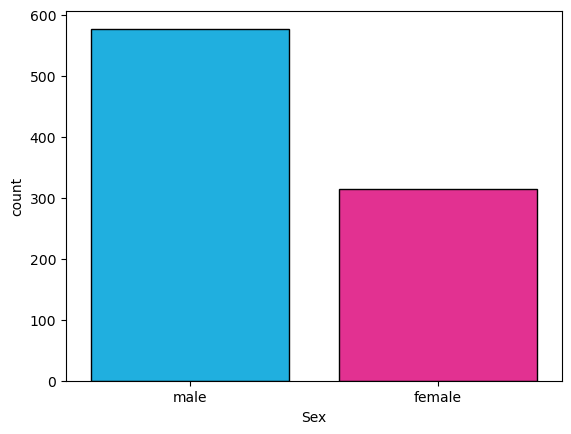

In [24]:
sns.countplot(data=titanic_data,x='Sex',palette=['deepskyblue','deeppink'],linewidth=1,edgecolor='black')

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


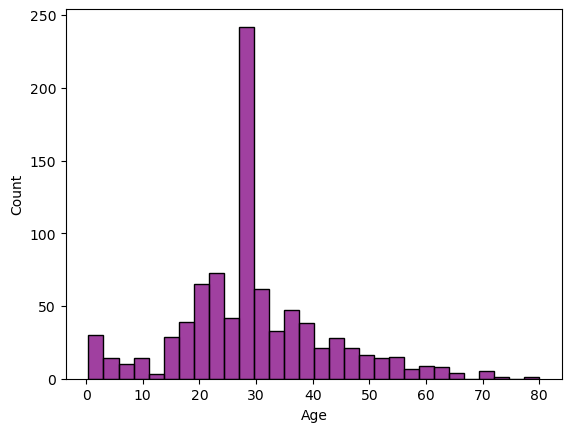

In [25]:
sns.histplot(data=titanic_data,x='Age',color='purple')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'


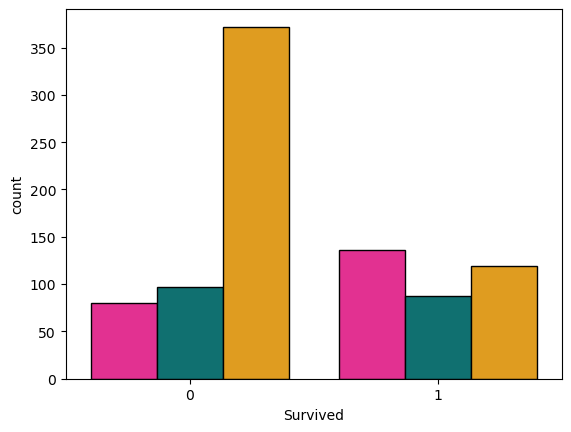

In [27]:
#Show count o survival with respect to Pclass
import seaborn as sns
try:
    sns.countplot(data=titanic_data,x='Survived',hue = titanic_data['Pclass'],palette=['deeppink','teal','orange'],linewidth=1,edgecolor='black')
except AttributeError as e:
    print("AttributeError:",e)
plt.show()

In [28]:
# Show count of survival with respect to Gender

In [29]:
titanic_data['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

<Axes: xlabel='Survived', ylabel='count'>

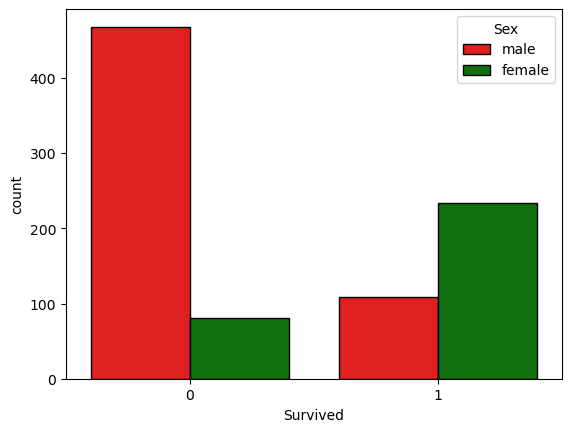

In [31]:
sns.countplot(x=titanic_data['Survived'],hue=titanic_data['Sex'],palette=['red','green'],linewidth=1,edgecolor='black')

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


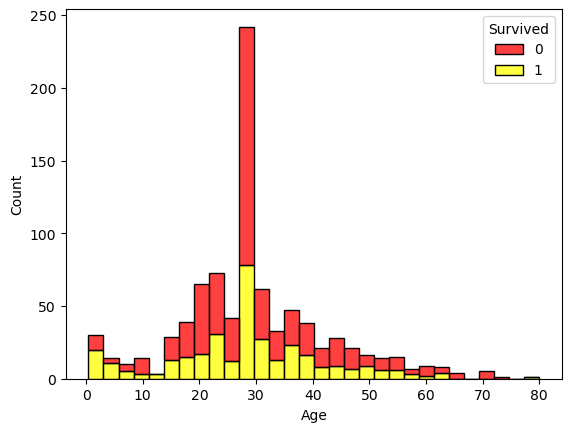

In [32]:
sns.histplot(x=titanic_data['Age'],hue=titanic_data['Survived'],palette=['red','yellow'],multiple='stack')
plt.show()

In [ ]:
# Show survived with resect to Embarked...
"""port of Embarkation
    C = Cherbourg
    Q = Queenstown
    S = Southampton""";

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


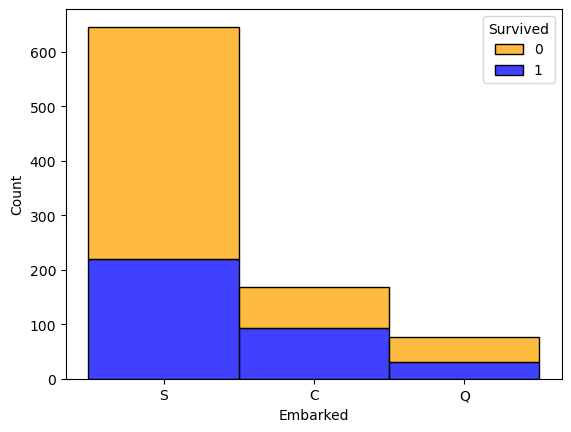

In [33]:
sns.histplot(x=titanic_data['Embarked'],hue=titanic_data['Survived'],palette=['orange','blue'],multiple='stack')
plt.show()

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


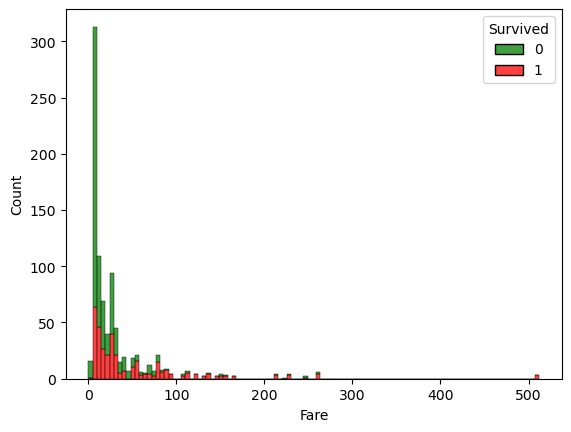

In [34]:
# Show survival with respect to Fare
sns.histplot(x=titanic_data['Fare'],hue=titanic_data['Survived'],palette=['green','red'],multiple='stack')
plt.show()

In [35]:
# Featuring Engineering
"""before modelling the data, transform gender(sex) into numeric
        Male = 1
        Female = 0
    Use LaabelEncoder from sklearn library""";

In [36]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
titanic_data['Sex'] = labelencoder.fit_transform(titanic_data['Sex'])
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


AttributeError: 'numpy.int64' object has no attribute 'startswith'


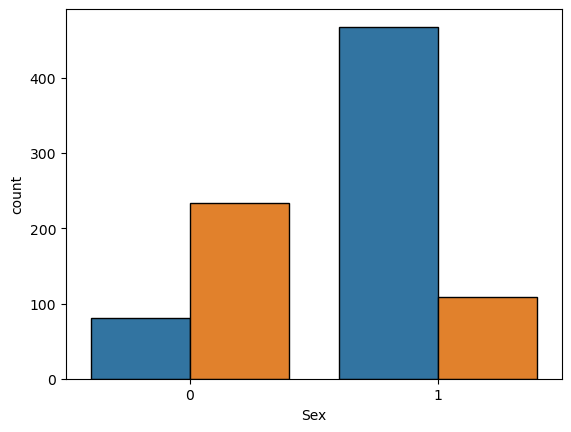

In [42]:
import seaborn as sns
try:
    sns.countplot(data=titanic_data,x='Sex',hue='Survived',linewidth=1,edgecolor='black')
except AttributeError as e:
    print("AttributeError:",e)
plt.show()

In [45]:
# Drop unnecessary column for modelling
titanic_data.drop(columns=["PassengerId","Name","SibSp","Parch","Ticket","Fare","Age","Embarked"],inplace=True)

In [46]:
titanic_data.head()

,Survived,Pclass,Sex
0,0,3,1
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,1


In [47]:
# Modeling
X=titanic_data[['Sex','Pclass']]
Y=titanic_data['Survived']

In [50]:
# Split datainto test and train by using Sklearn library
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [51]:
# Create training Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix
log = LogisticRegression(random_state = 0)
log.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [52]:
# Create Prediction Model
pred = log.predict(X_test)
pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [53]:
print("Accuracy_score :",accuracy_score(Y_test,pred))
print("Matrix :",confusion_matrix(Y_test,pred))

Accuracy_score : 0.7877094972067039
Matrix : [[92 18]
 [20 49]]


In [54]:
Y_test

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64

In [57]:
submission=X.iloc[:,:].values
y_final=log.predict(submission)

D:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [58]:
y_final.shape

(891,)

In [59]:
final=pd.DataFrame()
final['Sex']=X['Sex']
final["Survived"]=y_final

In [64]:
final.to_csv("submission.csv",index=False)

In [ ]:
# Training is completd,now check
# predict([[Pclass,Sex]])=>Survived or Not Survived

In [66]:
import warnings
warnings.filterwarnings("ignore")
result = log.predict([[5,0]])
if (result==0):
    print("So sorry, Not Survived")
else:
    print("Survived")
    

So sorry, Not Survived
